# Introduction to Applied Machine Learning

## Introduction

Machine learning is a subset of artificial intelligence that involves training algorithms to make predictions or decisions based on input data. It is a way of teaching computers to learn from data, without being explicitly programmed.

## Supervised Learning

Supervised learning is a type of machine learning where the algorithm is trained on a labeled dataset. The algorithm learns to map inputs to outputs based on examples of input/output pairs. The goal is to learn a general rule that can be applied to new, unseen data.

### Real-world application example: Image classification

Image classification is a common example of supervised learning. Given a dataset of labeled images, the algorithm can learn to recognize patterns in the images and classify new images accordingly.

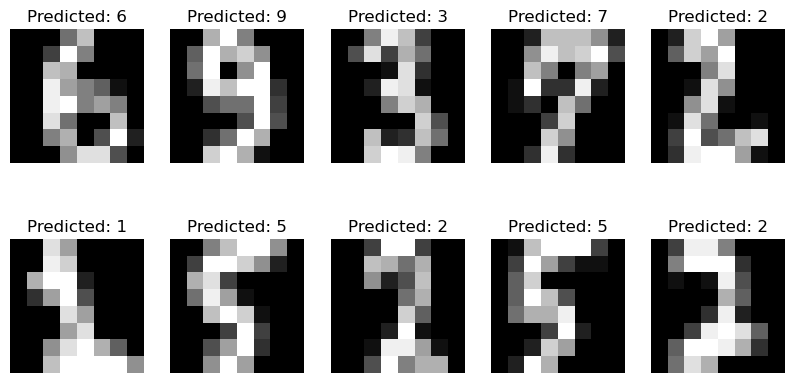

In [6]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the digits dataset
digits = load_digits()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Train a logistic regression model on the training set
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Visualize the model predictions
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
ax = ax.ravel()
for i in range(10):
    ax[i].imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax[i].set_title(f"Predicted: {y_pred[i]}")
    ax[i].axis('off')
plt.show()



## Unsupervised Learning

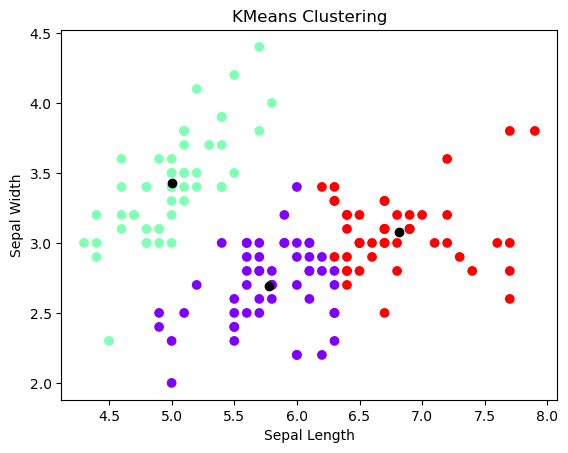

In [7]:
# This code performs KMeans clustering on the iris dataset, which contains measurements of different species of iris flowers. 
# The goal is to group the flowers into clusters based on their sepal length and width. 
# The code imports necessary libraries, loads the dataset, creates a KMeans object with 3 clusters, fits the data, and plots the resulting clusters.
# The black dots represent the centroids of each cluster.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()



## Reinforcement Learning


The game consists of an agent and an environment. The environment has 12 states numbered from 0 to 11. 
The agent starts at state 5 and can take two actions: "left" or "right". The goal of the agent is to 
reach either state 0 or state 11. The agent receives a reward of -1 for every step it takes, except 
when it reaches the goal states where it receives a reward of 0. The agent uses Q-learning to learn 
the optimal policy. The Q-values are updated using the Bellman equation. The agent explores the 
environment using an epsilon-greedy policy. The results of the training are plotted as Total Reward 
vs Episode.






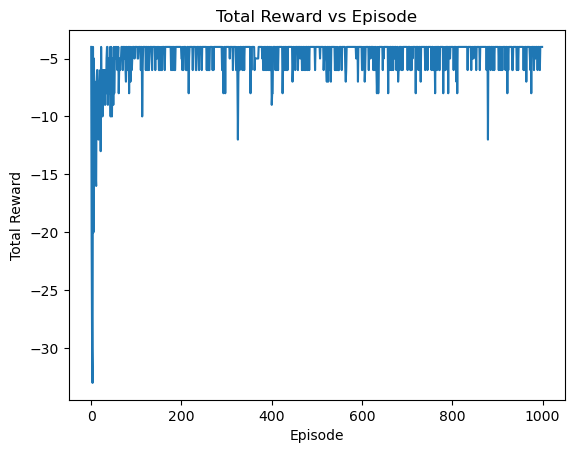

In [27]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Environment:
    def __init__(self):
        self.states = np.arange(0, 12)
        self.start_state = 5
        self.actions = ["left", "right"]
        self.rewards = np.zeros(len(self.states))
        self.rewards[1:-1] = -1
        
    def step(self, state, action):
        if action == "left":
            return state-1, self.rewards[state-1]
        elif action == "right":
            return state+1, self.rewards[state+1]
        
# Define the agent
class Agent:
    def __init__(self, alpha, gamma, epsilon):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_values = np.zeros((len(env.states), len(env.actions)))
        
    def choose_action(self, state):
        if np.random.uniform() < self.epsilon:
            return np.random.choice(env.actions)
        else:
            values = self.q_values[state-1]
            return env.actions[np.random.choice(np.where(values == values.max())[0])]
        
    def update_q_values(self, state, action, reward, next_state):
        next_action = self.choose_action(next_state)
        td_target = reward + self.gamma * self.q_values[next_state-1][env.actions.index(next_action)]
        td_error = td_target - self.q_values[state-1][env.actions.index(action)]
        self.q_values[state-1][env.actions.index(action)] += self.alpha * td_error
        
# Define the main function for training
def train(agent, env, num_episodes):
    rewards = np.zeros(num_episodes)
    for i in range(num_episodes):
        state = env.start_state
        total_reward = 0
        while True:
            action = agent.choose_action(state)
            next_state, reward = env.step(state, action)
            agent.update_q_values(state, action, reward, next_state)
            total_reward += reward
            state = next_state
            if state in [0, 11]:
                break
        rewards[i] = total_reward
    return rewards

# Train the agent
env = Environment()
agent = Agent(alpha=0.1, gamma=1, epsilon=0.1)
rewards = train(agent, env, num_episodes=1000)

# Plot the results
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Reward vs Episode")
plt.show()



